### Unsupervised Learning with Kmeans Clustering

Using unsupervised kmeans clustering for analysis on birth data on newborns and their mothers.
The input file is `birth.csv` ([source](https://www.kaggle.com/datasets/danbraswell/temporary-us-births)). The data contains the states, years, and data associated with newborns and their mothers.

Here are the goals of the analysis:

1. What are the common characteristics of women with the highest # of births?
- States, years, gender, education levels, age and weight distribution.
2. Cluster data into groups based on kmeans clustering. Use elbow method to find # of clusters.
3. Find correlations between birth weight/mother's age, # of births per mother, etc
4. Data prep and consolidation of all records into a number of summary tables.


In [32]:
# import files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans

Reading data into a df and inspecting the features of the data to best adapt it for analysis.

In [33]:
df = pd.read_csv("birth.csv")
display(df[:5])

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


Most of the column labels are self explanatory. In addition to the states, years, and number of births, there are data on:
- the mother's education level and age
- the newborn's gender and weight

In [34]:
print(len(df.State.unique()))
print("Number of unique state names")

51
Number of unique state names


In [35]:
print((df.State.unique()))
print("Unique state names. Washington DC (District of Columbia) is counted so the count is 51.")

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Unique state names. Washington DC (District of Columbia) is counted so the count is 51.


In [36]:
print(df.Year.unique())
print(df.groupby(['Year']).size())

print("Unique years and records per year")

[2016 2017 2018 2019 2020 2021]
Year
2016    915
2017    915
2018    917
2019    917
2020    916
2021    916
dtype: int64
Unique years and records per year


In [37]:
print(df.groupby(['Gender']).size())
print("Num of each gender")

Gender
F    2747
M    2749
dtype: int64
Num of each gender


In [38]:
print(df.groupby(['Education Level of Mother']).size())
print("Education level of mother vs count")

Education Level of Mother
8th grade or less                                                      612
9th through 12th grade with no diploma                                 612
Associate degree (AA, AS)                                              612
Bachelor's degree (BA, AB, BS)                                         612
Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)    612
High school graduate or GED completed                                  612
Master's degree (MA, MS, MEng, MEd, MSW, MBA)                          612
Some college credit, but not a degree                                  612
Unknown or Not Stated                                                  600
dtype: int64
Education level of mother vs count


In [39]:
print(df.groupby(['Education Level Code']).size())
print("Education Level Code counts")

Education Level Code
-9    600
 1    612
 2    612
 3    612
 4    612
 5    612
 6    612
 7    612
 8    612
dtype: int64
Education Level Code counts


In [40]:
df = df.dropna()
print(df.isnull().values.any())

False


Clean data, remove unknown levels of education and show results.

_Hint: use your output in the step 1 above to find the rows to remove_.

In [41]:
df = df[df['Education Level of Mother'] != "Unknown or Not Stated"]
print(df.shape)
print("Remaining rows and columns in dataset")

(4896, 9)
Remaining rows and columns in dataset


Removing duplicates from the dataset.

In [42]:
df.drop(columns=['State', 'Education Level of Mother'], inplace=True),'\n'
display(df)

,State Abbreviation,Year,Gender,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,AL,2016,F,1,1052,27.8,3116.9
1,AL,2016,F,2,3436,24.1,3040.0
2,AL,2016,F,3,8777,25.4,3080.0
3,AL,2016,F,4,6453,26.7,3121.9
4,AL,2016,F,5,2227,28.9,3174.3
...,...,...,...,...,...,...,...
5490,WY,2021,M,4,766,27.4,3234.3
5491,WY,2021,M,5,401,29.2,3261.1
5492,WY,2021,M,6,657,30.7,3286.0
5493,WY,2021,M,7,261,33.0,3249.3


Shortening the column labels.

In [43]:
df = df.rename(columns={"State Abbreviation":"State", "Education Level Code":"Education", "Number of Births":"Births", "Average Age of Mother (years)":"AvgAge", "Average Birth Weight (g)":"BirWeight"})
display(df[:5])

,State,Year,Gender,Education,Births,AvgAge,BirWeight
0,AL,2016,F,1,1052,27.8,3116.9
1,AL,2016,F,2,3436,24.1,3040.0
2,AL,2016,F,3,8777,25.4,3080.0
3,AL,2016,F,4,6453,26.7,3121.9
4,AL,2016,F,5,2227,28.9,3174.3


Remove the state and year column as they aren't relevant for this analysis.

In [44]:
df=df.drop(columns=['State', 'Year'])
df[:5]

,Gender,Education,Births,AvgAge,BirWeight
0,F,1,1052,27.8,3116.9
1,F,2,3436,24.1,3040.0
2,F,3,8777,25.4,3080.0
3,F,4,6453,26.7,3121.9
4,F,5,2227,28.9,3174.3


2e. For the Gender column, __convert 'F' to 0 and 'M' to 1__<br>
and __convert any other non-numeric data to numbers__.<br>
Then __print the data type of each column__ to show that everything is numeric data.

In [45]:
df['Gender'] = df['Gender'].str.replace('F','0')
df['Gender'] = df['Gender'].str.replace('M','1')
df["Gender"] = df["Gender"].astype("int64")
display(df[:5])
print(df.dtypes)

,Gender,Education,Births,AvgAge,BirWeight
0,0,1,1052,27.8,3116.9
1,0,2,3436,24.1,3040.0
2,0,3,8777,25.4,3080.0
3,0,4,6453,26.7,3121.9
4,0,5,2227,28.9,3174.3


Gender         int64
Education      int64
Births         int64
AvgAge       float64
BirWeight    float64
dtype: object


---

3. Analysis

3a. __Use the pairplot__ to show any correlation between the features and the distribution of each feature in the dataset.

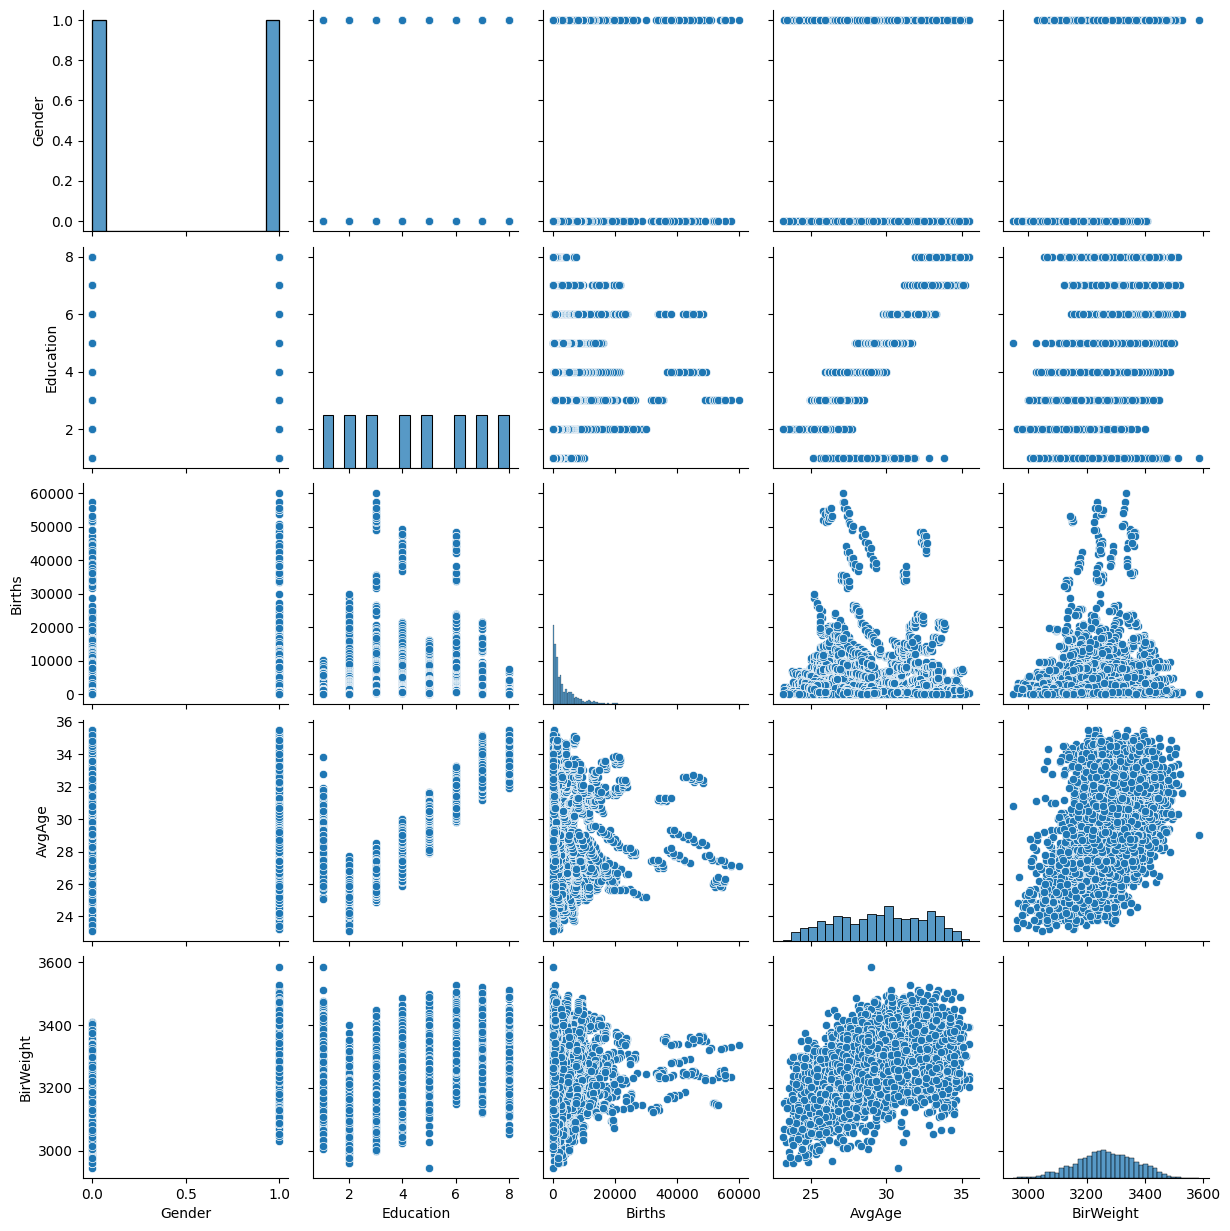

In [46]:
sns.pairplot(df)

3b. Looking at the pairplot, __create a Raw NBConvert cell to discuss your observations__ on:<br>
- The distribution of number of births, age of mothers, and weight of newborns
- Any correlation between the features

_Feel free to create code cells to show data that backs your observations_.

---

4. Machine Learning: Determine if the data can be separated into groups with similar characteristics.

4a. __Create the X dataset__ and __show the first 5 rows__.

In [47]:
X=df
display(X[:5])

,Gender,Education,Births,AvgAge,BirWeight
0,0,1,1052,27.8,3116.9
1,0,2,3436,24.1,3040.0
2,0,3,8777,25.4,3080.0
3,0,4,6453,26.7,3121.9
4,0,5,2227,28.9,3174.3


Determine the optimal number of clusters using the Elbow Curve Method. Where the elbow curve drops into a linear fashion, use the point right before that. We do that so we select the point where adding one additional cluster die

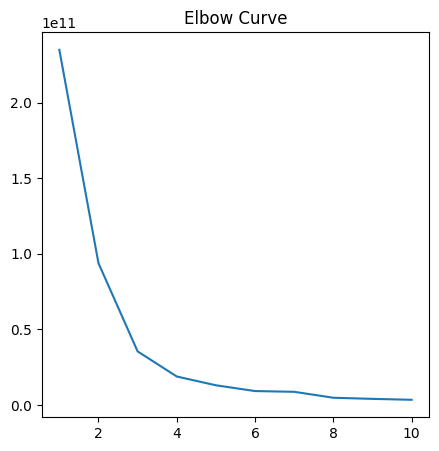

In [48]:
# 7. Calculate the optimal k value
wcss=[]
n_init=10
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 


Based on the elbow method, the best # of clusters is 4. Group the data into clusters.

In [49]:
kmeans = KMeans(n_clusters=4,init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
cluster_labels=kmeans.labels_
df['Cluster']=cluster_labels
cluster_birth_counts = df.groupby('Cluster')['Births'].sum()


Find the cluster with the highest # of births.

In [50]:
# Identify the cluster with the highest number of births
cluster_with_highest_births = cluster_birth_counts.idxmax()
highest_births = cluster_birth_counts.max()

print(f"Cluster {cluster_with_highest_births} has the highest number of births: {highest_births}")
cluster_highest_births_characteristics = df[df['Cluster'] == cluster_with_highest_births].mean()
print("Common characteristics of the cluster with the highest number of births:")
print(cluster_highest_births_characteristics)

Cluster 3 has the highest number of births: 7547414
Common characteristics of the cluster with the highest number of births:
Gender          0.502979
Education       4.484255
Births       6423.331064
AvgAge         29.035319
BirWeight    3262.490809
Cluster         3.000000
dtype: float64


Using kmeans output, we plot education and births to find correlations.

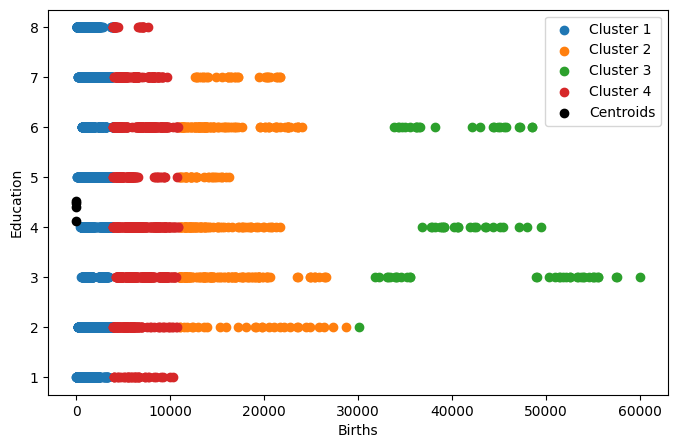

In [51]:
fig = plt.figure(figsize=(8,5))

# plotting each cluster
plt.scatter(X[y_kmeans == 0].Births, X[y_kmeans == 0].Education, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].Births, X[y_kmeans == 1].Education, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].Births, X[y_kmeans == 2].Education, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3].Births, X[y_kmeans == 3].Education, label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')

plt.xlabel('Births')
plt.ylabel('Education')
plt.legend()
plt.show()

## The cluster with the highest number of births is cluster 3, centering around education levels 3, 4, and 6.

Plot a 3-D graph of age, births, and weight.

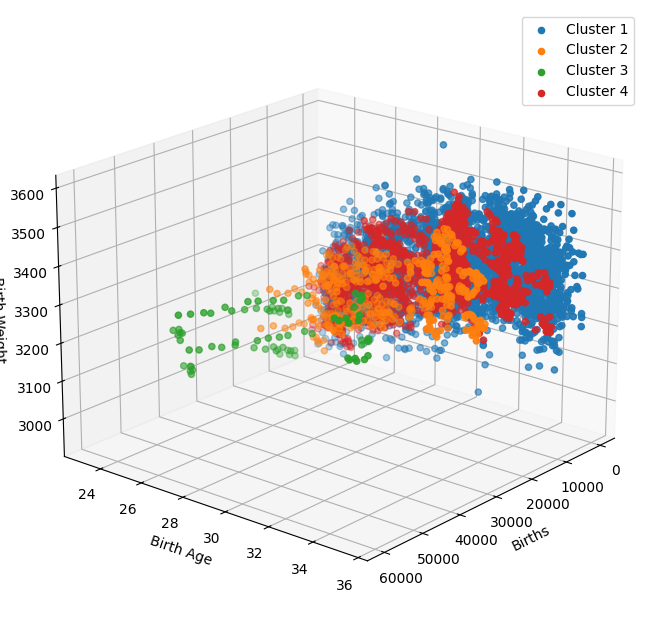

In [66]:
# 22.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# The next 5 lines should be in a loop
ax.scatter(X.Births[y_kmeans == 0], X.AvgAge[y_kmeans == 0], X.BirWeight[y_kmeans == 0], label = 'Cluster 1')
ax.scatter(X.Births[y_kmeans == 1], X.AvgAge[y_kmeans == 1], X.BirWeight[y_kmeans == 1], label = 'Cluster 2')
ax.scatter(X.Births[y_kmeans == 2], X.AvgAge[y_kmeans == 2], X.BirWeight[y_kmeans == 2], label = 'Cluster 3')
ax.scatter(X.Births[y_kmeans == 3], X.AvgAge[y_kmeans == 3], X.BirWeight[y_kmeans == 3], label = 'Cluster 4')
plt.xlabel('Births')
plt.ylabel('Birth Age')
ax.set_zlabel('Birth Weight')
ax.view_init(20,40)   # change these values to move / rotate the plot
plt.legend()
plt.show()

Finding common characteristics of the cluster with the highest number of births, using the original DF.

In [22]:
dfo = pd.read_csv("birth.csv")
dfo = dfo[dfo['Education Level of Mother'] != "Unknown or Not Stated"]
dfo = dfo[dfo['Number of Births']>=int(min(X[y_kmeans == 2].Births))] #Isolates Cluster 3 only
display(dfo[:5])

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
434,California,CA,2016,F,High school graduate or GED completed,3,57435,27.1,3235.8
435,California,CA,2016,F,"Some college credit, but not a degree",4,47094,28.4,3239.1
437,California,CA,2016,F,"Bachelor's degree (BA, AB, BS)",6,45550,32.3,3253.0
443,California,CA,2016,M,High school graduate or GED completed,3,59967,27.1,3335.3
444,California,CA,2016,M,"Some college credit, but not a degree",4,49404,28.4,3349.0


Prove that the new DB is the cluster with the highest # of births.

In [55]:
print("Min of cluster 3 (used dataset):")
display(min(dfo['Number of Births']))
print("Max of cluster 1:")
display(max(X[y_kmeans == 0].Births))
print("Max of cluster 2:")
display(max(X[y_kmeans == 1].Births))
print("Max of cluster 4:")
display(max(X[y_kmeans == 3].Births))

Min of cluster 3 (used dataset):


30035

Max of cluster 1:


3882

Max of cluster 2:


28687

Max of cluster 4:


10835

Find common characteristics of women with highest # of births.
Most frequent states/years, gender distribution, education distribution.
Plot histograms of average age of mothers and average birth weight and compare them against min/max age and birth weight of overall data.

States in cluster 3, and how often they appear
State
California    36
Florida       12
Texas         37
dtype: int64


Years in cluster 3 and how often they appear
Year
2016    15
2017    14
2018    14
2019    14
2020    14
2021    14
dtype: int64


Male and female in cluster 3 and how often they appear
Gender
F    42
M    43
dtype: int64


Education levels in cluster 3 and how often they appear
Education Level of Mother
9th through 12th grade with no diploma     1
Bachelor's degree (BA, AB, BS)            24
High school graduate or GED completed     36
Some college credit, but not a degree     24
dtype: int64




(array([1., 2., 1., 2., 2., 4., 0., 0., 1., 1., 1., 2., 1., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 5., 7., 9., 4., 6., 4., 0., 0., 0., 0., 3., 1.,
        2., 0., 0., 0., 0., 0., 1., 1., 3., 1., 4., 1., 4., 3., 1., 5.]),
 array([3123.8  , 3128.616, 3133.432, 3138.248, 3143.064, 3147.88 ,
        3152.696, 3157.512, 3162.328, 3167.144, 3171.96 , 3176.776,
        3181.592, 3186.408, 3191.224, 3196.04 , 3200.856, 3205.672,
        3210.488, 3215.304, 3220.12 , 3224.936, 3229.752, 3234.568,
        3239.384, 3244.2  , 3249.016, 3253.832, 3258.648, 3263.464,
        3268.28 , 3273.096, 3277.912, 3282.728, 3287.544, 3292.36 ,
        3297.176, 3301.992, 3306.808, 3311.624, 3316.44 , 3321.256,
        3326.072, 3330.888, 3335.704, 3340.52 , 3345.336, 3350.152,
        3354.968, 3359.784, 3364.6  ]),
 <BarContainer object of 50 artists>)

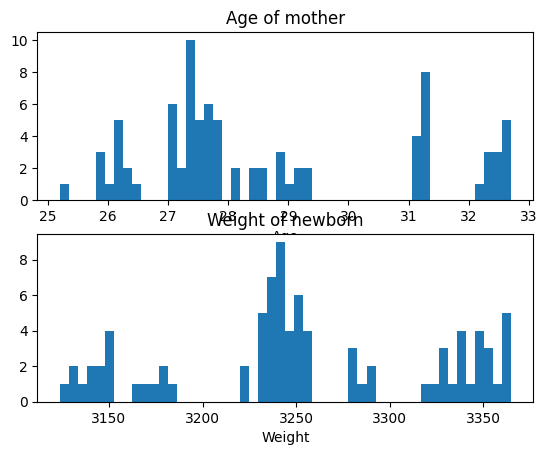

In [24]:
print("States in cluster 3, and how often they appear")
print(dfo.groupby(['State']).size())
print("\n")
print("Years in cluster 3 and how often they appear")
print(dfo.groupby(['Year']).size())
print("\n")
print("Male and female in cluster 3 and how often they appear")
print(dfo.groupby(['Gender']).size())
print("\n")
print("Education levels in cluster 3 and how often they appear")
print(dfo.groupby(['Education Level of Mother']).size())
print("\n")

plt.subplot(2, 1, 1)
plt.title("Age of mother")
plt.xlabel("Age")
plt.hist(dfo['Average Age of Mother (years)'], bins=50)
#print("Lowest age of mother: " + str(min(df['Average Age of Mother (years)'])) + "\nHighest age of mother: " + str(max(df['Average Age of Mother (years)'])))

plt.subplot(2, 1, 2)
plt.title("Weight of newborn")
plt.xlabel("Weight")
plt.hist(dfo['Average Birth Weight (g)'], bins=50)
#print("Lowest birth weight: " + str(min(df['Average Birth Weight (g)'])) + "\nHighest birth weight: " + str(max(df['Average Birth Weight (g)'])))

The highest number of births are concentrated in the states of california, florida, and texas. The year with the highest num of births is 2016.
The education level with the most births is 'High school graduate or GED completed'. The age with most births is 27.
The gender distribution is very close to 50/50. The average weight is around 3250, with the highest being 3585.7 and the lowest 2946.1.